In [108]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3
import pandas as pd
import math

## Task 1

Дано три множини користувачів:

- `rock_fans` — слухали рок: `{101, 102, 103, 105, 107, 109, 110, 112, 115, 118}`
- `pop_fans` — слухали поп: `{102, 104, 105, 106, 108, 110, 111, 113, 115, 117}`
- `jazz_fans` — слухали джаз: `{103, 105, 108, 110, 112, 114, 115, 116, 119, 120}`


Unique Users who listen AT LEAST one genre: {101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120}
Users who listen ALL three genres: {105, 115, 110}
Only Rock listeners: {109, 107, 101, 118}
Two genres listeners(Union - Symmetric Difference): {112, 108, 102, 103}
Two genres listeners(Intersection - Difference, Union): {112, 108, 102, 103}


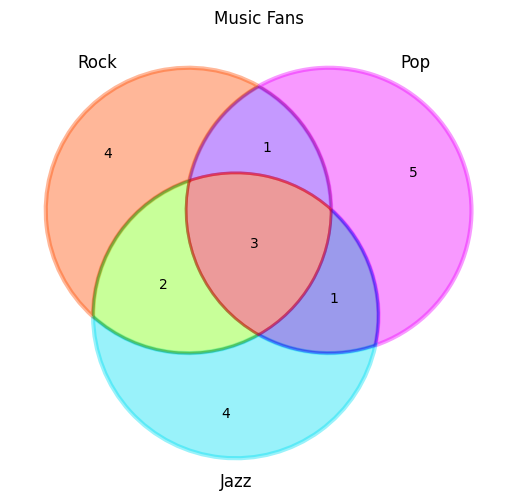

In [109]:
rock_fans = {101, 102, 103, 105, 107, 109, 110, 112, 115, 118}
pop_fans = {102, 104, 105, 106, 108, 110, 111, 113, 115, 117}
jazz_fans = {103, 105, 108, 110, 112, 114, 115, 116, 119, 120}

# 1. Unique users listen at least 1 genre (Union)
union = rock_fans.union(pop_fans, jazz_fans)  # or |
print(f"Unique Users who listen AT LEAST one genre: {union}")

# 2. User who listen ALL three genres (Intersection)
intersection = rock_fans.intersection(pop_fans, jazz_fans)  # or &
print(f"Users who listen ALL three genres: {intersection}")

# 3. Only Rock listeners (Difference)
diff = rock_fans - pop_fans - jazz_fans  # or .difference()
print(f"Only Rock listeners: {diff}")

# 4. Two-genres listeners (Intersection - Difference, Union OR Union - Symmetric Difference)
symmetric_diff = rock_fans.symmetric_difference(pop_fans).symmetric_difference(
    jazz_fans
)
two_genres = union - symmetric_diff
print(f"Two genres listeners(Union - Symmetric Difference): {two_genres}")

# Another approach
pop_jazz = pop_fans.intersection(jazz_fans) - rock_fans  # excluding rock_fans
pop_rock = pop_fans.intersection(rock_fans) - jazz_fans  # excluding jazz_fans
rock_jazz = rock_fans.intersection(jazz_fans) - pop_fans  # excluding pop_fans
two_genres_union = pop_jazz.union(pop_rock, rock_jazz)
print(f"Two genres listeners(Intersection - Difference, Union): {two_genres_union}")


#  Plot
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
v = venn3([rock_fans, pop_fans, jazz_fans], set_labels=("Rock", "Pop", "Jazz"))

v.get_patch_by_id("100").set_color("#FF4D00")  # only rock
v.get_patch_by_id("100").set_linewidth(3.0)
v.get_patch_by_id("010").set_color("#EE00FF")  # only pop
v.get_patch_by_id("010").set_linewidth(3.0)
v.get_patch_by_id("001").set_color("#00DFF3")  # only jazz
v.get_patch_by_id("001").set_linewidth(3.0)

# only rock and pop (rock & pop — jazz)
v.get_patch_by_id("110").set_color("#6F00FFAA")
v.get_patch_by_id("11").set_edgecolor("purple")
v.get_patch_by_id("11").set_linewidth(2.0)

# only rock and jazz (rock & jazz - pop)
v.get_patch_by_id("101").set_color("#77FF00AA")
v.get_patch_by_id("101").set_edgecolor("green")
v.get_patch_by_id("101").set_linewidth(2.0)

# only pop and jazz (pop & jazz - rock)
v.get_patch_by_id("011").set_color("#0603D0")
v.get_patch_by_id("011").set_edgecolor("blue")
v.get_patch_by_id("011").set_linewidth(2.0)

# all three(rock & pop & jazz)
v.get_patch_by_id("111").set_color("#D00303AA")
v.get_patch_by_id("111").set_edgecolor("red")
v.get_patch_by_id("111").set_linewidth(2.0)

plt.title("Music Fans")
plt.show()

## Task 2

Правила доступу до секцій:

Система має 4 рівні доступу. Доступ надається (True), якщо виконується логічна умова:

- Base (Базовий): Користувач є співробітником ТА верифікований ТА НЕ заблокований.
- Premium (Преміум): (Користувач є співробітником АБО має преміум) ТА верифікований ТА НЕ заблокований.
- Admin (Адмін-панель): Користувач є адміністратором ТА верифікований ТА НЕ заблокований.
- Secret (Секретні матеріали): (Користувач є адміністратором АБО (є співробітником ТА має преміум)) ТА верифікований ТА НЕ заблокований.

In [110]:
import itertools


def check_access(is_employee, is_verified, is_premium, is_admin, is_banned):
    base = is_employee and is_verified and not is_banned
    premium = (is_employee or is_premium) and is_verified and not is_banned
    admin = is_admin and is_verified and not is_banned
    secret = (
        (is_admin or (is_employee and is_premium)) and is_verified and not is_banned
    )

    return {"Base": base, "Premium": premium, "Admin": admin, "Secret": secret}


# Dataset
data = []
# All possible combinations
combinations = list(itertools.product([True, False], repeat=5))

for combo in combinations:
    is_employee, is_verified, is_premium, is_admin, is_banned = combo
    res = check_access(is_employee, is_verified, is_premium, is_admin, is_banned)

    row = {
        "Emp": int(is_employee),
        "Ver": int(is_verified),
        "Prem": int(is_premium),
        "Adm": int(is_admin),
        "Ban": int(is_banned),
        "Base": int(res["Base"]),
        "Premium": int(res["Premium"]),
        "Admin": int(res["Admin"]),
        "Secret": int(res["Secret"]),
    }
    data.append(row)

df = pd.DataFrame(data)
print(df)


# Conclusions
# For ALL sections ( verified Admin who is the employee, and Premium is optional in this case, beacuse for Premium is enough to be Employee
# Emp   Ver   Prem  Adm   Ban   | Base  Prem  Adm   Secr
# 1     1     1     1     0     |  1     1     1     1
# 1     1     0     1     0     |  1     1     1     1
all_section_mask = (
    (df["Base"] == 1) & (df["Premium"] == 1) & (df["Admin"] == 1) & (df["Secret"] == 1)
)
all_access = df[all_section_mask]
print("\nUsers with the access to ALL(4) sections:")
print(all_access)

# When the user has Premium but doesn't have Base (verified user with Premium, and admin is optional)because for premium the user must be Premium OR Employee, but for Base must be Employee.
# Emp   Ver   Prem  Adm   Ban   | Base  Prem  Adm   Secr
# 0     1     1     1     0     |  0     1     1     1
# 0     1     1     0     0     |  0     1     0     0
p_and_not_base_mask = (df["Base"] == 0) & (df["Premium"] == 1)
p_and_not_base = df[p_and_not_base_mask]
print("\nUsers with the access to Premium but NOT to Base:")
print(p_and_not_base)

    Emp  Ver  Prem  Adm  Ban  Base  Premium  Admin  Secret
0     1    1     1    1    1     0        0      0       0
1     1    1     1    1    0     1        1      1       1
2     1    1     1    0    1     0        0      0       0
3     1    1     1    0    0     1        1      0       1
4     1    1     0    1    1     0        0      0       0
5     1    1     0    1    0     1        1      1       1
6     1    1     0    0    1     0        0      0       0
7     1    1     0    0    0     1        1      0       0
8     1    0     1    1    1     0        0      0       0
9     1    0     1    1    0     0        0      0       0
10    1    0     1    0    1     0        0      0       0
11    1    0     1    0    0     0        0      0       0
12    1    0     0    1    1     0        0      0       0
13    1    0     0    1    0     0        0      0       0
14    1    0     0    0    1     0        0      0       0
15    1    0     0    0    0     0        0      0      

## Task 3

У пулі кандидатів є:

- Back-end розробники: 8 осіб
- Front-end розробники: 6 осіб
- UI/UX Дизайнери: 4 особи

Згідно з бюджетом та архітектурою проєкту, команда має складатися рівно з 5 осіб і мати таку структуру:

- `2` Back-end розробники.
- `2` Front-end розробники.
- `1` Дизайнер.


In [111]:
# Candidates
backend_devs = ["Alex", "Maria", "Igor", "Elena", "Max", "Dmitry", "Anna", "Sergey"]
frontend_devs = ["Victor", "Julia", "Artem", "Svetlana", "Oleg", "Natalia"]
designers = ["Catherine", "Andrew", "Oksana", "Taras"]

#  Needs
backend_needs = 2
frontend_needs = 2
designers_needs = 1

# Combination without repeats C = n!/(n-k)!*k!
backend_combs = math.factorial(len(backend_devs)) / (math.factorial(len(backend_devs) - backend_needs) * math.factorial(backend_needs))
print(f"Analytical result for backend: {int(backend_combs)}")
frontend_combs = math.factorial(len(frontend_devs)) / (math.factorial(len(frontend_devs) - frontend_needs) * math.factorial(frontend_needs))
print(f"Analytical result for fronend: {int(frontend_combs)}")

# Considering that we need only 1 designer, we can simplify the C = n!/(n-k)! *k! to C = n!/(n-k)
designers_combs = math.factorial(len(designers)) / math.factorial(len(designers) - designers_needs)
print(f"Analytical result for designers: {int(designers_combs)}")

# Total combinations
total_combs = backend_combs * frontend_combs * designers_combs
print(f"Total combinations: {int(total_combs)}")

# Math module check
back = math.comb(len(backend_devs), backend_needs)
front = math.comb(len(frontend_devs), frontend_needs)
design = math.comb(len(designers), designers_needs)
print(f"(Math module) for backend: {back}")
print(f"(Math module) for frontend: {front}")
print(f"(Math module) for desing: {design}")

Analytical result for backend: 28
Analytical result for fronend: 15
Analytical result for designers: 4
Total combinations: 1680
(Math module) for backend: 28
(Math module) for frontend: 15
(Math module) for desing: 4


## Task 4

Співробітники та їхні контакти (неорієнтований граф):

- Анна спілкується з: Богдан, Віктор, Ганна
- Богдан спілкується з: Анна, Віктор, Дмитро
- Віктор спілкується з: Анна, Богдан, Ганна, Дмитро
- Ганна спілкується з: Анна, Віктор, Євген
- Дмитро спілкується з: Богдан, Віктор, Євген
- Євген спілкується з: Ганна, Дмитро

In [112]:
vertecies = ["Анна", "Богдан", "Віктор", "Ганна", "Дмитро", "Євген"]


#  Adjacency List
adj_list = {
    "Анна": ["Богдан", "Віктор", "Ганна"],
    "Богдан": ["Анна", "Віктор", "Дмитро"],
    "Віктор": ["Анна", "Богдан", "Ганна", "Дмитро"],
    "Ганна": ["Анна", "Віктор", "Євген"],
    "Дмитро": ["Богдан", "Віктор", "Євген"],
    "Євген": ["Ганна", "Дмитро"],
}


#  Edge list
edges = set()  # using set to avoid duplicates
for employee, contacts in adj_list.items():
    for c in contacts:
        edge = tuple(sorted((employee, c)))
        edges.add(edge)
print(f"Edges list: {list(edges)}\n")


# Adjacency Matrix
#  Represent name as index
vertex_idx = {name: i for i, name in enumerate(vertecies)}
n = len(vertecies)
# Create an empty matrix
adj_matrix = [[0] * n for _ in range(n)]
#  Fill the matrix
for i, j in edges:
    adj_matrix[vertex_idx[i]][vertex_idx[j]] = 1
    adj_matrix[vertex_idx[j]][vertex_idx[i]] = 1  # symmetric

print(f"Adjacency Matrix: {adj_matrix}\n")


# Degrees
degrees = {}
print("Vertices degrees:")
for employee, contacts in adj_list.items():
    degrees[employee] = len(contacts)
    print(f"{employee}: {degrees[employee]}")


# Most and least social
max_degree = max(degrees.values())
min_degree = min(degrees.values())

most_social = [k for k, v in degrees.items() if v == max_degree]
least_social = [k for k, v in degrees.items() if v == min_degree]
print(f"The most({max_degree}): {', '.join(most_social)}")
print(f"The least({min_degree}): {', '.join(least_social)}\n")


# Theory check
sum_degrees = sum(degrees.values())
print(f"Sum of degrees: {sum_degrees}")
doubled_edges = 2 * len(edges)
print(f"Double edges amount: {doubled_edges}")

if sum_degrees == doubled_edges:
    print(f"Theory is correct. {sum_degrees} = {doubled_edges}")

Edges list: [('Богдан', 'Віктор'), ('Богдан', 'Дмитро'), ('Анна', 'Віктор'), ('Віктор', 'Ганна'), ('Євген', 'Ганна'), ('Євген', 'Дмитро'), ('Анна', 'Ганна'), ('Віктор', 'Дмитро'), ('Анна', 'Богдан')]

Adjacency Matrix: [[0, 1, 1, 1, 0, 0], [1, 0, 1, 0, 1, 0], [1, 1, 0, 1, 1, 0], [1, 0, 1, 0, 0, 1], [0, 1, 1, 0, 0, 1], [0, 0, 0, 1, 1, 0]]

Vertices degrees:
Анна: 3
Богдан: 3
Віктор: 4
Ганна: 3
Дмитро: 3
Євген: 2
The most(4): Віктор
The least(2): Євген

Sum of degrees: 18
Double edges amount: 18
Theory is correct. 18 = 18
